<a href="https://colab.research.google.com/github/jeungsengho/python0610/blob/main/10_%EC%83%81%EA%B6%8C%EB%B3%84_%EC%97%85%EC%A2%85_%EB%B0%80%EC%A7%91_%ED%86%B5%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 공공 데이터 상권 정보 분석하기**

* https://www.data.go.kr/dataset/15012005/fileData.do


In [13]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
%matplotlib inline

In [15]:
!sudo apt-get install -y NanumBarunGothic
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package NanumBarunGothic
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [8]:
shop = pd.read_csv('./shop_2016.csv', encoding='ms949')
shop

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,상권명칭,상권번호,관리년월,대분류명,중분류명,과밀지수(밀집도)
0,강릉역광장_2,2523,201601,소매,가전제품소매,1.0818
1,구미역_3,1149,201601,소매,가전제품소매,0.8865
2,전북 전주시 중화산1동_1,768,201601,소매,가전제품소매,1.1757
3,충청북도청_2,1309,201601,소매,가전제품소매,0.3574
4,충북 청주시 복대1동_1,1311,201601,소매,가전제품소매,0.6849
...,...,...,...,...,...,...
805676,경남 양산시 덕계동_1,626,201612,소매,NaN,1.2906
805677,경북 구미시 신평1동_2,1143,201612,업종분류불능,NaN,0.5677
805678,안양역_5,1663,201612,소매,NaN,1.6597
805679,양산역,616,201612,소매,NaN,1.4103


In [23]:
shop_2018_06 = pd.read_csv('shop_201806_01.csv', encoding='euc-kr')
shop_2018_06.shape

ParserError: ignored

In [19]:
shop_2018_06.head()

NameError: ignored

In [17]:
shop_2018_06.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [18]:
view_columns = ['상호명', '지점명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명',
                '시도명', '시군구명', '행정동명', '법정동명', '지번주소', '도로명주소', '경도', '위도']
shop_2018_06[view_columns].head()

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,지번주소,도로명주소,경도,위도
0,와라와라호프,NaN,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 역삼동 696-42,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,NaN,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 독산동 162-1,서울특별시 금천구 가산로 34-6,126.899220,37.471711
3,싱싱커피&토스트,NaN,음식,패스트푸드,토스트전문,부산광역시,사상구,괘법동,괘법동,부산광역시 사상구 괘법동 578,부산광역시 사상구 괘감로 37,128.980455,35.159774
4,가락사우나내스낵,NaN,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 석촌동 256,서울특별시 송파구 가락로 71,127.104071,37.500249


In [20]:
shop_2018_06.isnull().sum()

상가업소번호            0
상호명               0
지점명          166153
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      11755
표준산업분류명       11755
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              1
법정동코드             1
법정동명              1
지번코드              1
대지구분코드            1
대지구분명             1
지번본번지             1
지번부번지         28707
지번주소              1
도로명코드             1
도로명               1
건물본번지             1
건물부번지        153876
건물관리번호            1
건물명          102480
도로명주소             1
구우편번호             1
신우편번호             4
동정보          160202
층정보           65778
호정보          152454
경도                1
위도                1
dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_

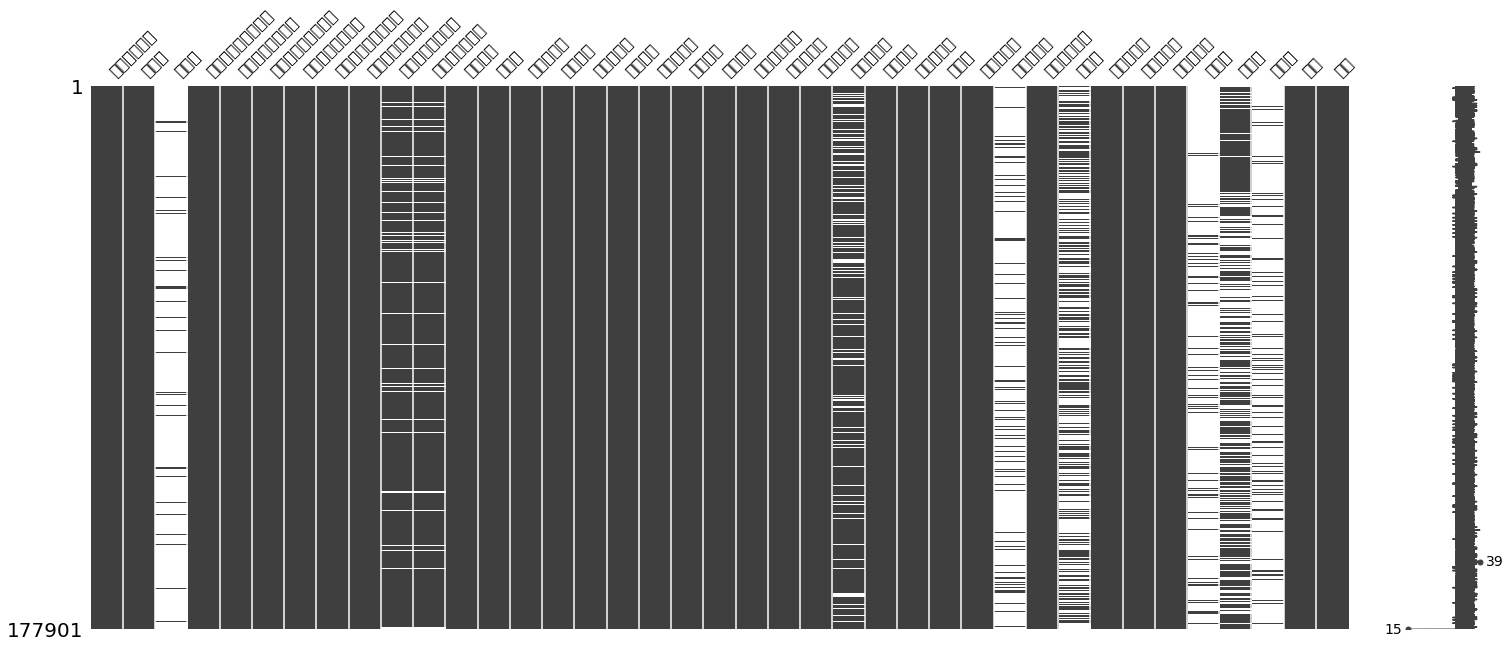

In [34]:
msno.matrix(shop_2018_06)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44428 missing from current font.
  font.set_

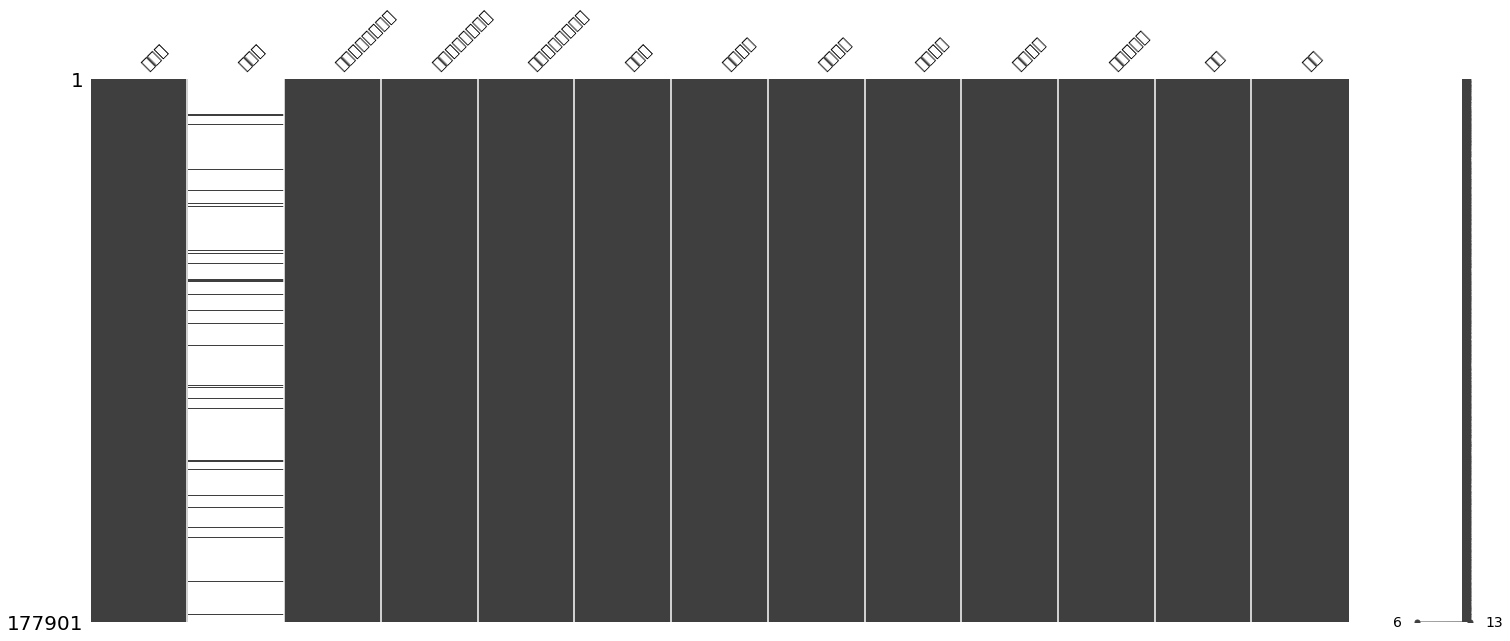

In [21]:
msno.matrix(shop_2018_06[view_columns])

In [23]:
ggplot(shop_2018_06, aes(x='경도', y='위도')) + geom_point() + theme(text=element_text(family='NanumBarumGothic'), figure_size=(7,10))

NameError: ignored